<a href="https://colab.research.google.com/github/rz2699/5243Team14_FinalProject/blob/main/Final_Project_(Coding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

## Import unclean dataset

In [2]:
df_uc = pd.read_csv('laptopData.csv') # df_uc = df_unclean
print(f'Columns: {df_uc.columns}\n Shape: {df_uc.shape}')

Columns: Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')
 Shape: (1303, 12)


In [3]:
df_uc.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df_uc = df_uc.drop('Unnamed: 0', axis=1)
df_uc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


### Duplicates

In [5]:
# Drop duplicates
print("Number of duplicate records:",{df_uc.duplicated().sum()})
df_uc.drop_duplicates(inplace=True)

Number of duplicate records: {np.int64(58)}


### NA rows
There is only one row with all null value. Simply drop this row

In [6]:
df_uc.isna().sum()

,0
Company,1
TypeName,1
Inches,1
ScreenResolution,1
Cpu,1
Ram,1
Memory,1
Gpu,1
OpSys,1
Weight,1


In [7]:
df_uc[df_uc.isna().any(axis=1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop na row
df_uc.dropna(inplace=True)

In [9]:
df_uc[df_uc.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.7200
476,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.2400
770,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,?,AMD Radeon R7 M445,Windows 10,2.3kg,62938.0656


### Convert to Numeric

In [10]:
df_uc['Inches'].value_counts()

,count
Inches,
15.6,621
14,188
17.3,162
13.3,157
12.5,38
11.6,29
12,6
13.9,6
13.5,5


In [11]:
df_uc['Inches'] = pd.to_numeric(df_uc['Inches'], errors='coerce')

**Note:** There is one NA value under column `Inches`

In [12]:
df_uc[~df_uc['Ram'].str.contains('GB', na=False)].count().sum()

np.int64(0)

In [13]:
# Convert col "Ram" to numeric
df_uc['Ram'] = df_uc['Ram'].apply(lambda x: float(x.strip('GB')))

In [14]:
df_uc[~df_uc['Weight'].str.contains('kg')]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8.0,256GB SSD,Intel UHD Graphics 620,Windows 10,?,77202.72


In [15]:
df_uc['Weight'] = pd.to_numeric(df_uc['Weight'].str.replace('kg', ''), errors='coerce')

**Note:** There is one NA value under column `Weight`

In [16]:
# Impute NA vlues for Inches and Weight to reduce the effect
df_uc['Inches'].fillna(df_uc['Inches'].median(), inplace=True)
df_uc['Weight'].fillna(df_uc['Weight'].median(), inplace=True)

#### Adding new features

In [17]:
df_uc['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,493
1366x768,255
IPS Panel Full HD 1920x1080,222
IPS Panel Full HD / Touchscreen 1920x1080,50
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [18]:
# Leave out the brand info and only KEEP screen resolution width & height
df_uc[['Res_width', 'Res_height']] = (
    df_uc['ScreenResolution']
    .str
    .extract(r'(\d{3,4})x(\d{3,4})')
    .astype(float)
)

Pixel density, pixel per inch (PPI) = (Square root of (Horizontal pixels² + Vertical pixels²) ) / Diagonal screen size (inches).


In [19]:
df_uc['PPI'] = np.sqrt((df_uc['Res_width']**2) + (df_uc['Res_height']**2)) / df_uc['Inches']

In [20]:
# Assess the correlation of all numeric cols with 'Price'
num_col = df_uc.select_dtypes(include=np.number).columns
df_uc[num_col].corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.681922
Res_width,0.553040
Res_height,0.549308
PPI,0.464694
Weight,0.176330
Inches,0.042767


In [21]:
# Drop multicolinear columns
df_uc.drop(columns=['Res_width', 'Res_height', 'Inches'], inplace=True)

### Combine small counts catrgory

In [22]:
def label_plot_dist_cat(df, cat_col, target):
    fig, axes = plt.subplots(len(cat_col), 1)
    if  len(cat_col) == 1:
        axes = [axes]
    for i, column in enumerate(cat_col):
        order = df.groupby(column)[target].mean().sort_values(ascending=False).index
        sns.barplot(data=df, x=column, y=target, order=order, ax=axes[i], palette="Blues_d", saturation=0.8)
        axes[i].set_title(f'Bar Plot for {column} with Avg {target}')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

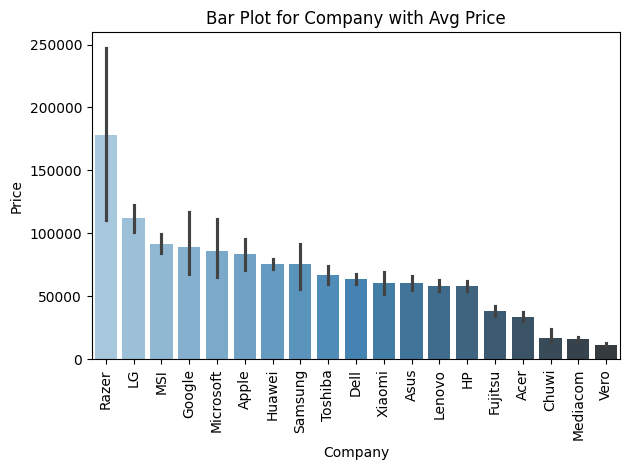

In [23]:
label_plot_dist_cat(df_uc, ['Company'], 'Price')

#### Categorical col: Company

In [24]:
company_counts = df_uc['Company'].value_counts()
print(company_counts)

Company
Lenovo       282
Dell         281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64


There are some category of `Company` is litte can replace all with 'other'

In [25]:
# threshold = 20
company_kept = company_counts[company_counts >= 20].index
df_uc['Company'] = df_uc['Company'].apply(lambda x: x if x in company_kept else 'Other')

#### Categorical col: TypeName

In [26]:
df_uc['TypeName'].value_counts() # all good

,count
TypeName,
Notebook,689
Gaming,203
Ultrabook,189
2 in 1 Convertible,112
Workstation,29
Netbook,22


#### Categorical col: OpSys

In [27]:
df_uc['OpSys'].value_counts()

,count
OpSys,
Windows 10,1022
No OS,63
Linux,57
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


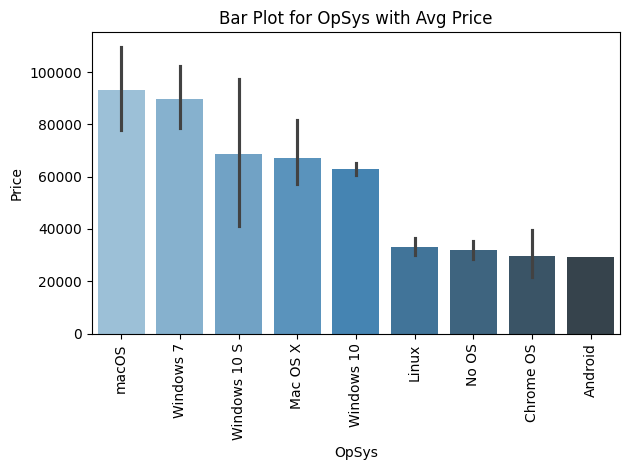

In [28]:
label_plot_dist_cat(df_uc, ['OpSys'], 'Price')

Group similar OS types into broader categories

In [29]:
def cat_os(x):
    x_lower = x.lower()
    if "windows" in x_lower:
        return "Windows"
    elif "mac" in x_lower:
        return "Mac"
    else:
        return "Others/No OS/Linux"

df_uc['OpSys'] = df_uc['OpSys'].apply(cat_os)

#### Categorical col: Cpu

In [30]:
# CPU
df_uc['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,142
Intel Core i7 7500U 2.7GHz,126
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
Intel Core M 6Y54 1.1GHz,1
Samsung Cortex A72&A53 2.0GHz,1
AMD E-Series 9000 2.2GHz,1


In [31]:
df_uc['Cpu brand'] = df_uc['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df_uc['Cpu brand'].value_counts()

,count
Cpu brand,
Intel Core i7,503
Intel Core i5,410
Intel Core i3,132
Intel Celeron Dual,68
Intel Pentium Quad,27
Intel Core M,17
AMD A9-Series 9420,12
AMD A6-Series 9220,8
Intel Celeron Quad,8


In [32]:
def cpu_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
      if text.split()[0] == 'Intel':
        return 'Other Intel Processor'
      elif text.startswith('AMD'):
        return 'AMD Processor'
      else:
        return 'Other Processor'

df_uc["Cpu processor"] = df_uc["Cpu brand"].apply(cpu_processor)

In [33]:
df_uc['Cpu processor'].value_counts()

,count
Cpu processor,
Intel Core i7,503
Intel Core i5,410
Other Intel Processor,138
Intel Core i3,132
AMD Processor,60
Other Processor,1


#### Categorical col: Gpu

In [34]:
# GPU
df_uc['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,269
Intel HD Graphics 520,177
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [35]:
df_uc['Gpu_brand'] = df_uc['Gpu'].apply(lambda x: x.split()[0])
df_uc['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,684
Nvidia,389
AMD,170
ARM,1


#### Categorical col: Memory

In [36]:
df_uc['Memory'].value_counts()

,count
Memory,
256GB SSD,401
1TB HDD,209
500GB HDD,121
512GB SSD,112
128GB SSD + 1TB HDD,92
128GB SSD,72
256GB SSD + 1TB HDD,71
32GB Flash Storage,35
2TB HDD,16


In [37]:
# Drop row with Memory = ? since there's no way to determine the memory
ind = df_uc[df_uc['Memory'] == '?'].index
df_uc.drop(index=ind, inplace=True)

In [38]:
# Consistency across GB and TB (1TB = 1000GB)
df_uc['Memory'] = df_uc['Memory'].str.replace('\.0', '', regex=True)
df_uc["Memory"] = df_uc["Memory"].str.replace('GB', '')
df_uc["Memory"] = df_uc["Memory"].str.replace('TB', '000')

# Split the two layers (connect with +)
new = df_uc["Memory"].str.split("+", n=1, expand=True)
df_uc["first"] = new[0].str.strip()
df_uc["second"] = new[1].fillna('0')

# Create storage type for Layer 1
df_uc["Layer1HDD"] = df_uc["first"].apply(lambda x: 1 if "HDD" in x else 0)
df_uc["Layer1SSD"] = df_uc["first"].apply(lambda x: 1 if "SSD" in x else 0)
df_uc["Layer1Hybrid"] = df_uc["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df_uc["Layer1Flash_Storage"] = df_uc["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Create storage type for Layer 2
df_uc["Layer2HDD"] = df_uc["second"].apply(lambda x: 1 if "HDD" in x else 0)
df_uc["Layer2SSD"] = df_uc["second"].apply(lambda x: 1 if "SSD" in x else 0)
df_uc["Layer2Hybrid"] = df_uc["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df_uc["Layer2Flash_Storage"] = df_uc["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numbers and convert to interger
df_uc['first'] = df_uc['first'].str.replace(r'\D', '', regex=True)
df_uc['second'] = df_uc['second'].str.replace(r'\D', '', regex=True)
df_uc['first'] = df_uc['first'].astype(int)
df_uc['second'] = df_uc['second'].astype(int)

# Create final memory type columns
df_uc["HDD"] = (df_uc["first"] * df_uc["Layer1HDD"] + df_uc["second"] * df_uc["Layer2HDD"])
df_uc["SSD"] = (df_uc["first"] * df_uc["Layer1SSD"] + df_uc["second"] * df_uc["Layer2SSD"])
df_uc["Hybrid"] = (df_uc["first"] * df_uc["Layer1Hybrid"] + df_uc["second"] * df_uc["Layer2Hybrid"])
df_uc["Flash_Storage"] = (df_uc["first"] * df_uc["Layer1Flash_Storage"] + df_uc["second"] * df_uc["Layer2Flash_Storage"])

df_uc.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                    'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                    'Layer2Flash_Storage'], inplace=True)

In [39]:
df_clean = df_uc.drop(columns=['ScreenResolution', 'Cpu', 'Cpu brand', 'Gpu', 'Memory'])

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1243 non-null   object 
 1   TypeName       1243 non-null   object 
 2   Ram            1243 non-null   float64
 3   OpSys          1243 non-null   object 
 4   Weight         1243 non-null   float64
 5   Price          1243 non-null   float64
 6   PPI            1243 non-null   float64
 7   Cpu processor  1243 non-null   object 
 8   Gpu_brand      1243 non-null   object 
 9   HDD            1243 non-null   int64  
 10  SSD            1243 non-null   int64  
 11  Hybrid         1243 non-null   int64  
 12  Flash_Storage  1243 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 136.0+ KB


In [41]:
df_clean.shape

(1243, 13)

In [42]:
# download clean data
df_clean.to_csv('laptopData_CLEAN.csv', index=False)